# k-means clustering
This notebook demonstrates k-means clustering using scikit-learn

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers.

In [2]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


In [4]:
# Importing the dataset Mall_Customers.csv
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()
# print first 5 rowa

# Describe the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
x=dataset.iloc[:,[3,4]].values

In [8]:
print(type(x))

<class 'numpy.ndarray'>


In [9]:
print(x[0:5,:])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [3]:
# data types


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [12]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [13]:
y_kmeans.shape

(200,)

In [14]:
print(y_kmeans[0:5])

[2 3 2 3 2]


In [20]:
np.unique(y_kmeans)

array([0, 1, 2, 3, 4])

In [21]:
y_kmeans[y_kmeans==2]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [22]:
np.where(y_kmeans==2)

(array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42, 44], dtype=int64),)

In [ ]:
#y_kmeans=2,0  means in cluster 2 belongs to cluster 2 0th coordinate and 1st coordinate

In [23]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

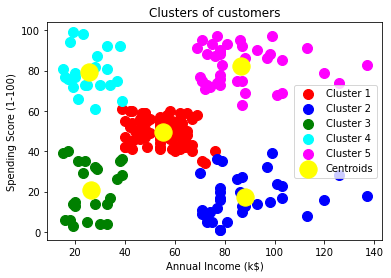

In [11]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [6]:
#  number of clusters and each cluster size


(array([0, 1, 2, 3, 4], dtype=int32), array([81, 35, 23, 22, 39]))

In [7]:
#to know the centrids of clusters


array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [24]:
kmeans.inertia_

44448.45544793371

[181363.5959596  106348.37306211  73679.78903949  44448.45544793
  37233.81451071  30259.65720729  25011.83934916  21850.16528259
  19672.07284901  17887.08445663  15917.60968943  14312.66860917
  12802.7916603 ]


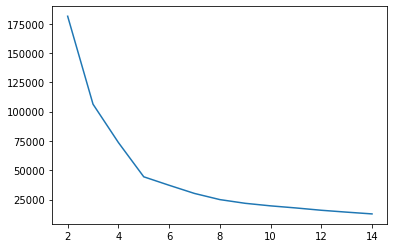

In [25]:
# Using the elbow method to find the optimal number of clusters
# random_state : random number generation for centroid generation
# Use a new random number generator seeded by the given integer. 
# Using an int will produce the same results across different calls. 
# However, it may be worthwhile checking that your results are stable across
# a number of different distinct random seeds. Popular integer random seeds are 0 and 42.
inertia = []
kl = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    kl.append(k)
    
a = np.array(inertia)
print(a)
plt.plot(kl,a)

In [ ]:
#Please do the same after standardizing the data using standardscalar
# observe the difference

Resources:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [29]:
x1=x
x1[:,1]=x1[:,1]*1000